In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__
print(tf.__version__)
print("all installed in the end!")


2.20.0
all installed in the end!


In [36]:
#loading the precomputed  model
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()

# Use only one layer for deep dream
layer_name = 'mixed3'  # You can change this to any valid layer name
layer_output = base_model.get_layer(layer_name).output
deep_dream_model = tf.keras.Model(inputs=base_model.input, outputs=layer_output)

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_470 (Conv2D) │ (None, None,      │        864 │ input_layer_5[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_470[0][0]  │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_470      │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_471 (Conv2D) │ (None, None,      │      9,216 │ activation_470[0… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_471[0][0]  │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_471      │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_472 (Conv2D) │ (None, None,      │     18,432 │ activation_471[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_472[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_472      │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, None,      │          0 │ activation_472[0… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_473 (Conv2D) │ (None, None,      │      5,120 │ max_pooling2d_20… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_473[0][0]  │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_473      │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_474 (Conv2D) │ (None, None,      │    138,240 │ activation_473[0… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_474[0][0]  │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_474      │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

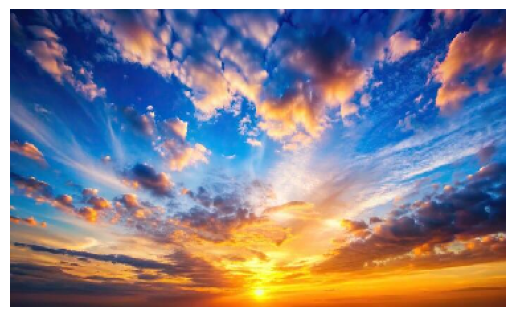

In [37]:
#loading the image and preprocessing it
image = tf.keras.preprocessing.image.load_img('sky.png', target_size=(225, 375))
plt.imshow(image)
plt.axis('off')
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)


In [38]:
#getting the activations of the layers
#first we will expand aa single image into a batch for model predicition
image_batch = tf.expand_dims(image, axis=0)

#setting the activations
activation = deep_dream_model(image_batch)
activation[0].shape
print('shape of activation of first layer:', activation[0].shape)
print('both the activations have the same batch size and same shape as the input image')  

shape of activation of first layer: (12, 21, 768)
both the activations have the same batch size and same shape as the input image


In [ ]:
#calculating the loss function

def calculate_loss(image, network):
    image_batch = tf.expand_dims(image, axis=0)
    activation = network(image_batch)
    # Since activation is a single tensor, not a list
    return tf.math.reduce_mean(activation)

loss = calculate_loss(image, deep_dream_model)
print('loss:', loss)

loss: tf.Tensor(0.46138453, shape=(), dtype=float32)


In [40]:
#backpropagation step   
@tf.function
def deep_dream(network, image, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = calculate_loss(image, network)

        gradients= tape.gradient(loss, image)
        gradients /= tf.math.reduce_std(gradients) 
        image = image + gradients * learning_rate
        image = tf.clip_by_value(image, -1, 1)

        return loss, image  
    

def inverse_transform(image):
    image = 255 * (image + 1.0) / 2.0
    return tf.cast(image, tf.uint8)


def run_deep_dream(image, network, epochs, learning_rate):
    for epoch in epochs:
        loss, image = deep_dream(network, image, learning_rate)

        if epoch % 200 == 0:
            plt.figure(figsize=(12, 12))
            plt.imshow(inverse_transform(image))
            plt.axis('off')
            plt.show()
            print('epoch:', epoch, 'loss:', loss)


In [41]:
#executing the deep dream
try:
    run_deep_dream(image, deep_dream_model, range(1000), 0.05)
except Exception as e:
    print("Error during deep dream execution:", e)

Error during deep dream execution: in user code:

    File "C:\Users\2004s\AppData\Local\Temp\ipykernel_1472\2597914871.py", line 6, in deep_dream  *
        loss = calculate_loss(image, network)
    File "C:\Users\2004s\AppData\Local\Temp\ipykernel_1472\2910600890.py", line 9, in calculate_loss  *
        for act in activations:
    File "c:\Users\2004s\Documents\deep dreaming\.venv\Lib\site-packages\tensorflow\core\function\capture\capture_container.py", line 144, in capture_by_value
        graph._validate_in_scope(tensor)  # pylint: disable=protected-access

    InaccessibleTensorError: <tf.Tensor 'Mean:0' shape=() dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
    Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.
    
    <tf.Tensor 'Mean:0' shape=() dtype=float32> was defined here:
        File "<frozen runpy>", line